In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [17]:
art_df = pd.read_sql_table('artist_df', 'sqlite:///spotify.db')  
nums_df = pd.read_sql_table('nums_df', 'sqlite:///spotify.db')
song_df = pd.read_sql_table('song_df', 'sqlite:///spotify.db')
feat_df = pd.read_sql_table('feat_df', 'sqlite:///spotify.db')
feat_artist_df = pd.read_sql_table('feat_artist_df', 'sqlite:///spotify.db')

In [18]:
df = song_df.merge(art_df, left_on='artist_id', right_on='artist_id', )
df = df.merge(nums_df, left_on='title_id', right_on='title_id')
df = df

Want to find the artists with the highest and lowewst danceability

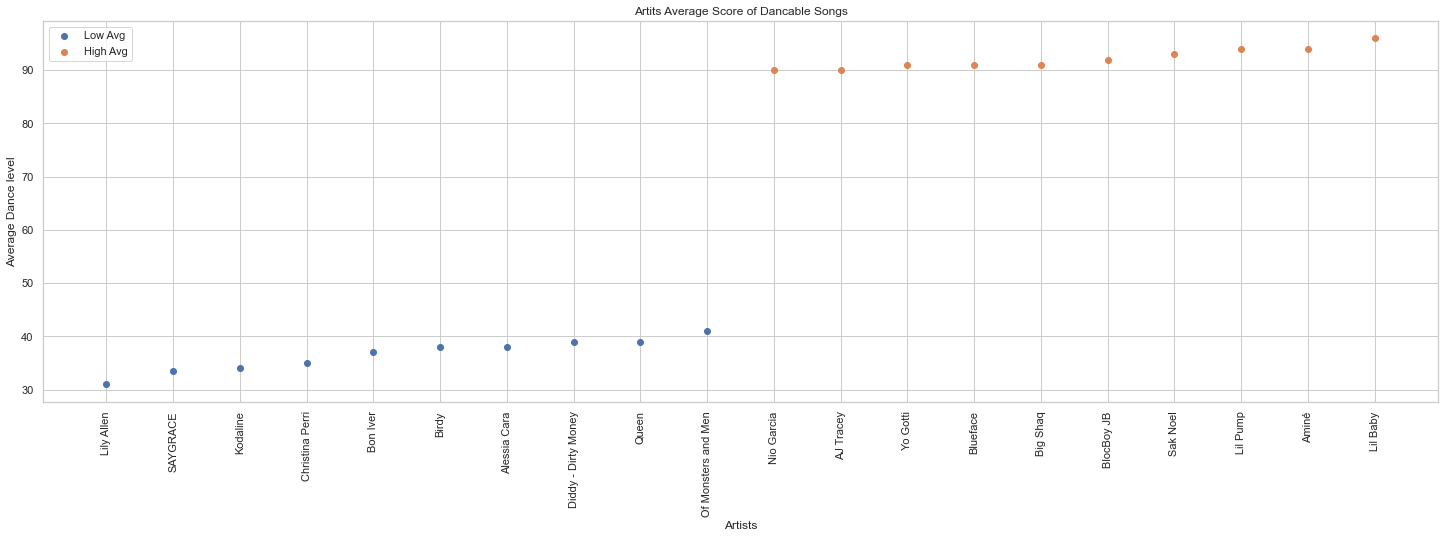

                     dnce
artist                   
Lily Allen           31.0
SAYGRACE             33.5
Kodaline             34.0
Christina Perri      35.0
Bon Iver             37.0
Birdy                38.0
Alessia Cara         38.0
Diddy - Dirty Money  39.0
Queen                39.0
Of Monsters and Men  41.0
            dnce
artist          
Nio Garcia  90.0
AJ Tracey   90.0
Yo Gotti    91.0
Blueface    91.0
Big Shaq    91.0
BlocBoy JB  92.0
Sak Noel    93.0
Lil Pump    94.0
Aminé       94.0
Lil Baby    96.0


In [19]:
artist = pd.DataFrame(df[['artist','dnce' ]].dropna())
dance_by_artist = artist.groupby(['artist'], sort=True).mean()
dance_by_artist = dance_by_artist.sort_values(by=['dnce'])
dance_by_artist.tail(10)
artist.groupby(['artist','dnce'])

plt.figure(figsize=(25,7))
plt.title('Artits Average Score of Dancable Songs')
plt.scatter(dance_by_artist.head(10).index, dance_by_artist['dnce'].head(10), label= "Low Avg", )
plt.scatter(dance_by_artist.tail(10).index, dance_by_artist['dnce'].tail(10), label= "High Avg")
plt.xlabel('Artists')
plt.ylabel('Average Dance level')
plt.xticks(rotation='vertical')
plt.legend(loc='upper left')
plt.show()
print(dance_by_artist.head(10))
print(dance_by_artist.tail(10))

Used a boxen plot to show the Distrubtion of BPM by Year.

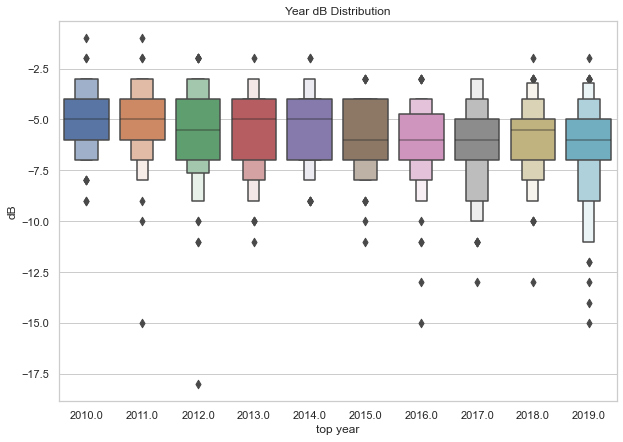

,top year,dB
0,2010.0,-6.0
1,2010.0,-4.0
2,2010.0,-7.0
3,2014.0,-7.0
4,2010.0,-4.0
...,...,...
995,2019.0,-6.0
996,2019.0,-9.0
997,2019.0,-5.0
998,2019.0,-6.0


In [20]:
year_db = pd.DataFrame(df[['top year','dB' ]].dropna())
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
plt.title('Year dB Distribution')
plt.xlabel('distribution')
sns.boxenplot(data = year_db, x= 'top year', y = 'dB')
plt.show()
year_db


Show the trend of the dB over the years

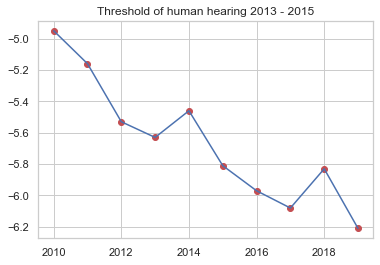

            dB
top year      
2010.0   -4.95
2011.0   -5.16
2012.0   -5.53
2013.0   -5.63
2014.0   -5.46
2015.0   -5.81
2016.0   -5.97
2017.0   -6.08
2018.0   -5.83
2019.0   -6.21


In [21]:
year_mean = year_db.groupby(year_db['top year']).mean()
plt.title('Threshold of human hearing 2013 - 2015')
plt.plot(year_mean.index, year_mean['dB'] )
plt.scatter(year_mean.index, year_mean['dB'] ,marker = 'o', color = 'r' )
plt.show()
print(year_mean)

The artists with the closested and farthest from the threshold level

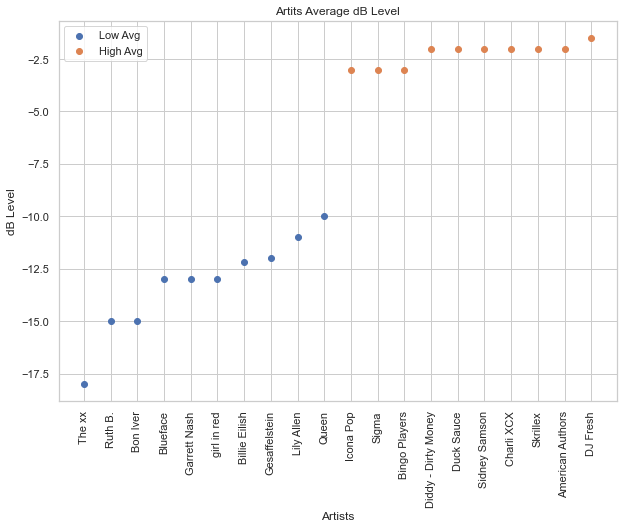

                      dB
artist                  
The xx        -18.000000
Ruth B.       -15.000000
Bon Iver      -15.000000
Blueface      -13.000000
Garrett Nash  -13.000000
girl in red   -13.000000
Billie Eilish -12.166667
Gesaffelstein -12.000000
Lily Allen    -11.000000
Queen         -10.000000
                      dB
artist                  
Icona Pop           -3.0
Sigma               -3.0
Bingo Players       -3.0
Diddy - Dirty Money -2.0
Duck Sauce          -2.0
Sidney Samson       -2.0
Charli XCX          -2.0
Skrillex            -2.0
American Authors    -2.0
DJ Fresh            -1.5


In [22]:
artist = pd.DataFrame(df[['artist','dB' ]].dropna())
db_by_artist = artist.groupby(['artist'], sort=True).mean().sort_values(by=['dB'])

plt.figure(figsize=(10,7))
plt.title('Artits Average dB Level')
plt.scatter(db_by_artist.head(10).index, db_by_artist['dB'].head(10), label= "Low Avg", )
plt.scatter(db_by_artist.tail(10).index, db_by_artist['dB'].tail(10), label= "High Avg")
plt.xlabel('Artists')
plt.ylabel('dB Level')
plt.xticks(rotation='vertical')
plt.legend(loc='upper left')
plt.show()
print(db_by_artist.head(10))
print(db_by_artist.tail(10))

Number of popular songs per artist year. Excluding artists number of songs per year less than 3.

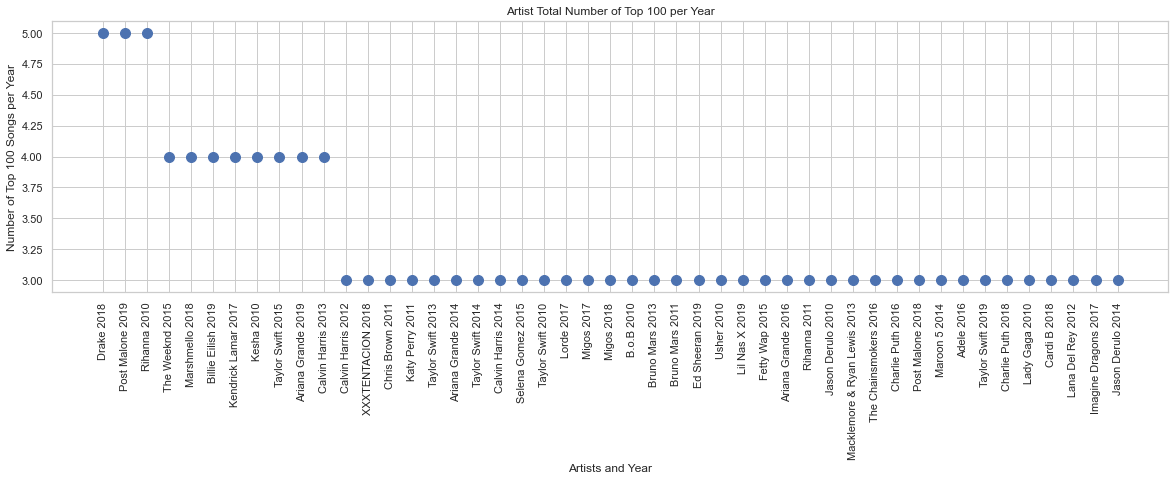

                                  0                   artist  top year
artist                  top year                                      
Drake                   2018.0    5                    Drake    2018.0
Post Malone             2019.0    5              Post Malone    2019.0
Rihanna                 2010.0    5                  Rihanna    2010.0
The Weeknd              2015.0    4               The Weeknd    2015.0
Marshmello              2018.0    4               Marshmello    2018.0
Billie Eilish           2019.0    4            Billie Eilish    2019.0
Kendrick Lamar          2017.0    4           Kendrick Lamar    2017.0
Kesha                   2010.0    4                    Kesha    2010.0
Taylor Swift            2015.0    4             Taylor Swift    2015.0
Ariana Grande           2019.0    4            Ariana Grande    2019.0
Calvin Harris           2013.0    4            Calvin Harris    2013.0
                        2012.0    3            Calvin Harris    2012.0
XXXTEN

In [23]:
artist_year = pd.DataFrame(df[['artist','top year']].dropna())
artist_year = pd.DataFrame(artist_year[['artist','top year']].value_counts())
temp = pd.DataFrame(artist_year)
temp = temp.loc[temp[0]>2]
temp['artist'] = temp.index.get_level_values(0)
temp['top year'] = temp.index.get_level_values(1)
x=[]
for i in range(0,len(temp['artist'])):
    x.append(temp['artist'].iloc[i] + ' ' + str(int(temp['top year'].iloc[i])))

plt.figure(figsize=(20,5))
plt.title('Artist Total Number of Top 100 per Year')
plt.xlabel('Artists and Year')
plt.ylabel('Number of Top 100 Songs per Year')
plt.xticks(rotation='vertical')
y = np.arange(0, int(temp[ 0 ][0]) + 1)
#plt.yticks(y)
plt.scatter(x , temp[ 0 ], 100) 
plt.show()

print(temp)

The number of artist type

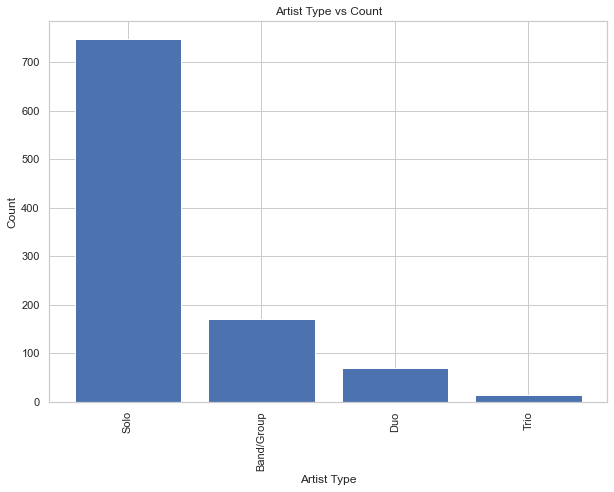

               0 artist type
artist type                 
Solo         747        Solo
Band/Group   170  Band/Group
Duo           70         Duo
Trio          13        Trio


In [24]:
artist_type = pd.DataFrame(df[['artist type']].dropna())
artist_type = pd.DataFrame(artist_type[['artist type']].value_counts())
artist_type['artist type'] = artist_type.index.get_level_values(0)

x=[]
for i in range(0,len(artist_type.index)):
    x.append(artist_type['artist type'].iloc[i])
plt.figure(figsize=(10,7))
plt.title('Artist Type vs Count')
plt.xlabel('Artist Type')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.bar(x,artist_type[0])
plt.show()

print(artist_type)

Display the genres bpm

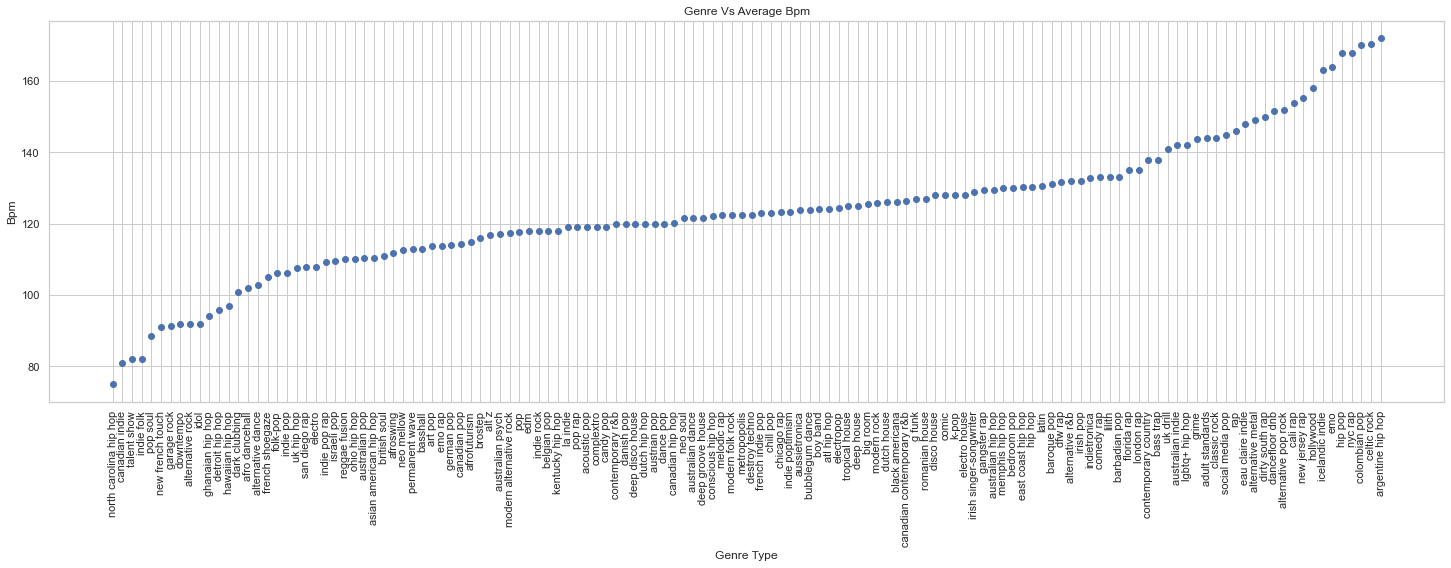

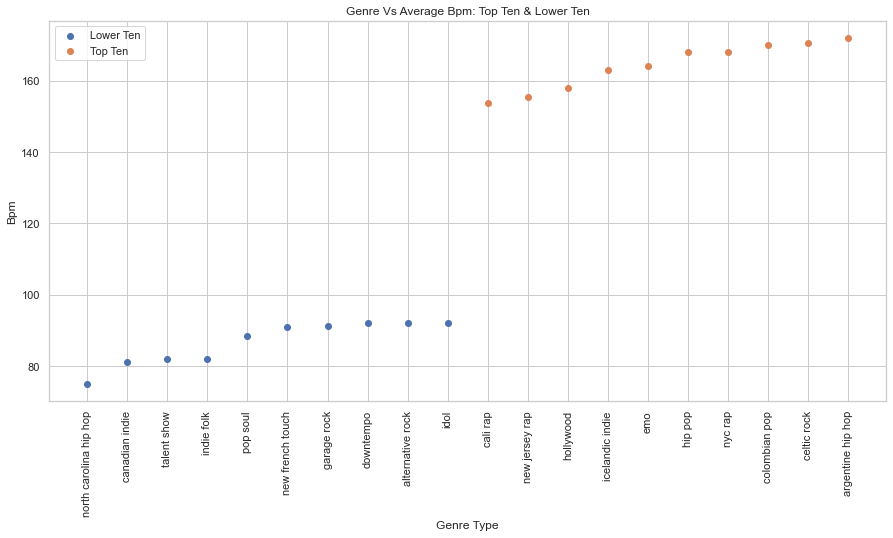

                              bpm
top genre                        
north carolina hip hop  75.000000
canadian indie          81.000000
talent show             82.000000
indie folk              82.000000
pop soul                88.500000
new french touch        91.000000
garage rock             91.333333
downtempo               92.000000
alternative rock        92.000000
idol                    92.000000
                          bpm
top genre                    
cali rap           153.750000
new jersey rap     155.333333
hollywood          158.000000
icelandic indie    163.000000
emo                164.000000
hip pop            168.000000
nyc rap            168.000000
colombian pop      170.000000
celtic rock        170.500000
argentine hip hop  172.000000


In [25]:
genre_bpm = pd.DataFrame(df[['top genre', 'bpm']].dropna())

genre_bpm = pd.DataFrame(genre_bpm.groupby(genre_bpm['top genre']).mean())
genre_bpm = pd.DataFrame(genre_bpm.sort_values(['bpm']))
plt.figure(figsize=(25,7))
plt.xticks(rotation='vertical')
plt.title('Genre Vs Average Bpm')
plt.xlabel('Genre Type')
plt.ylabel('Bpm')
plt.scatter(genre_bpm.index,genre_bpm['bpm'])
plt.show()
plt.figure(figsize=(15,7))
plt.xticks(rotation='vertical')
plt.title('Genre Vs Average Bpm: Top Ten & Lower Ten')
plt.xlabel('Genre Type')
plt.ylabel('Bpm')
plt.scatter(genre_bpm.head(10).index,genre_bpm['bpm'].head(10), label = 'Lower Ten')
plt.scatter(genre_bpm.tail(10).index,genre_bpm['bpm'].tail(10), label = 'Top Ten')
plt.legend()
plt.show()

print(genre_bpm.head(10))
print(genre_bpm.tail(10))


Show the count of each genre. Excluding count of 5 or less.

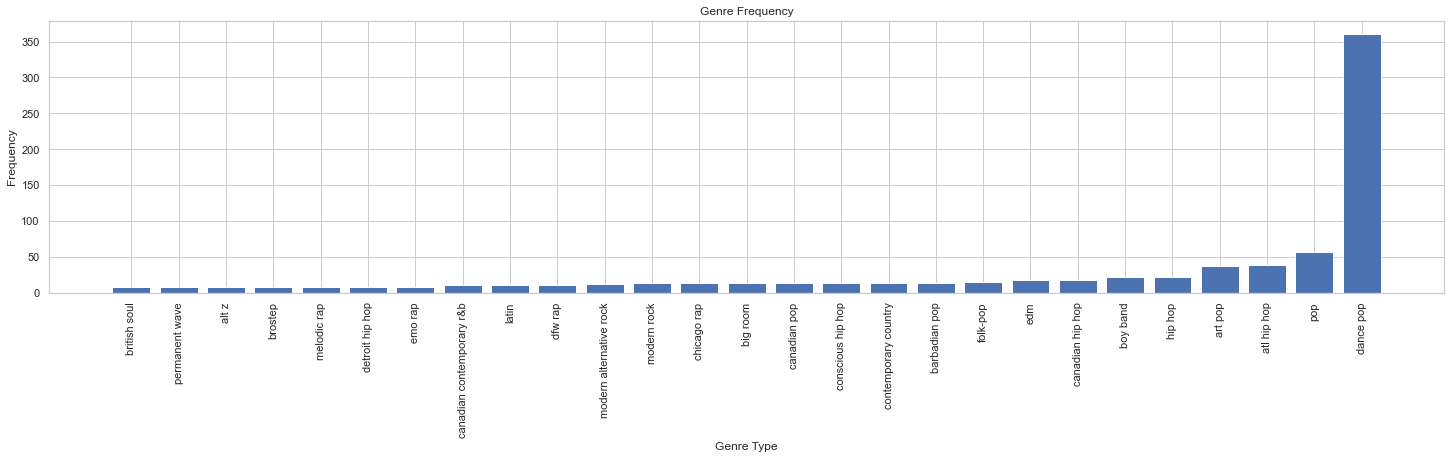

top genre
canadian contemporary r&b     10
latin                         10
dfw rap                       10
modern alternative rock       12
modern rock                   13
chicago rap                   13
big room                      13
canadian pop                  13
conscious hip hop             14
contemporary country          14
barbadian pop                 14
folk-pop                      15
edm                           17
canadian hip hop              18
boy band                      21
hip hop                       21
art pop                       37
atl hip hop                   39
pop                           57
dance pop                    361
dtype: int64


In [26]:
genre_db = pd.DataFrame(df[['top genre']].dropna())
genre_db = pd.DataFrame(genre_db).value_counts('top genre', ascending = True)
genre = genre_db.loc[genre_db.values>7]
plt.figure(figsize=(25,5))
plt.title('Genre Frequency')
plt.xlabel('Genre Type')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.bar(x = genre.index,  height=genre.values)
plt.show()
print(genre.tail(20))


Using a violin plot to show the Distrubtion of Genres.

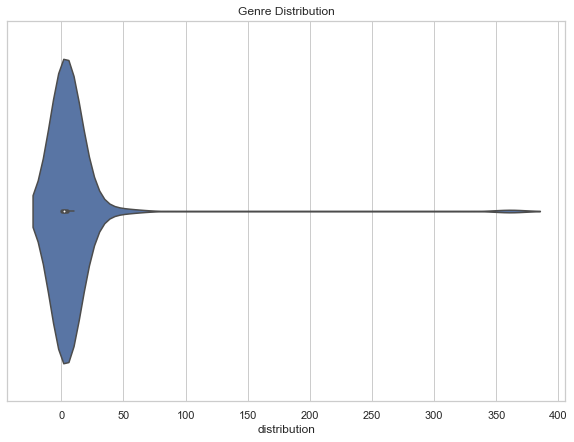

top genre
acoustic pop          1
french indie pop      1
electro house         1
eau claire indie      1
uk drill              1
                   ... 
hip hop              21
art pop              37
atl hip hop          39
pop                  57
dance pop           361
Length: 132, dtype: int64


In [27]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
plt.title('Genre Distribution')
plt.xlabel('distribution')
sns.violinplot(x=genre_db)
plt.show()
print(genre_db)

Using a displot plot to show the Distrubtion of BPM of Genres and plot the kernel density estimate.

<Figure size 720x504 with 0 Axes>

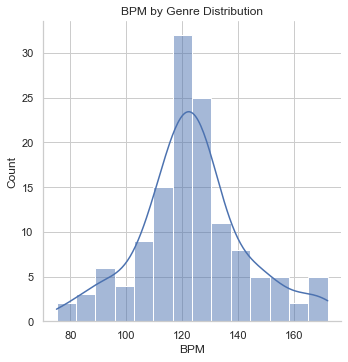

                          bpm
top genre                    
north carolina hip hop   75.0
canadian indie           81.0
talent show              82.0
indie folk               82.0
pop soul                 88.5
...                       ...
hip pop                 168.0
nyc rap                 168.0
colombian pop           170.0
celtic rock             170.5
argentine hip hop       172.0

[132 rows x 1 columns]


In [28]:
plt.figure(figsize=(10,7))
sns.displot(x=genre_bpm['bpm'], kde=True)
sns.set_theme(style="whitegrid")
plt.title('BPM by Genre Distribution')
plt.xlabel('BPM')
plt.show()
print(genre_bpm)

In [29]:
#first do some initial merging from sql tables to get desired table of artists that have been on the chart as a featured artist AND as the main artist
df = feat_artist_df.merge(feat_df, left_on='feat_artist_id', right_on='feat_artist_id', how='inner')
df = df[['feat_artist_id', 'feat_artist', 'title_id']]
feat_and_solo_artists = df.merge(art_df, left_on='feat_artist', right_on='artist', how='inner')
feat_and_solo_artists = feat_and_solo_artists[['feat_artist_id', 'feat_artist','title_id', 'artist_id']] #get the columns I want
feat_and_solo_artists #all the artists that have made the charts by themselves and as a feat artist
#this also shows the title_id for the songs they featured on
times_featured = feat_and_solo_artists.groupby(['feat_artist'])['title_id'].count().reset_index(name='times featured') #count how many times artists were featured

artist_unique = feat_and_solo_artists[['feat_artist_id', 'feat_artist', 'artist_id']].drop_duplicates() #only want the artist not the title_id for they song they were featured on
solo_artist_songs = artist_unique.merge(song_df, left_on='artist_id', right_on='artist_id', how='left') #now let's figure out how many songs they got on the chart themselves
times_independent = solo_artist_songs.groupby(['feat_artist'])['title'].count().reset_index(name='times independent') #keep count as it's own column

times_feat_and_indep = times_featured.merge(times_independent, left_on='feat_artist', right_on='feat_artist', how='inner') #lets get all that info together
times_feat_and_indep = times_feat_and_indep.sort_values(by=['times independent','times featured'], ascending=False ) #sort it by independent then featured descend

Graph the times artists were on the top 100 chart as the main artist and as a featured artist.

C:\Users\OGUNSAKINS\AppData\Local\Temp\ipykernel_20688\302781358.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =times_feat_and_indep['feat_artist'], rotation=90)


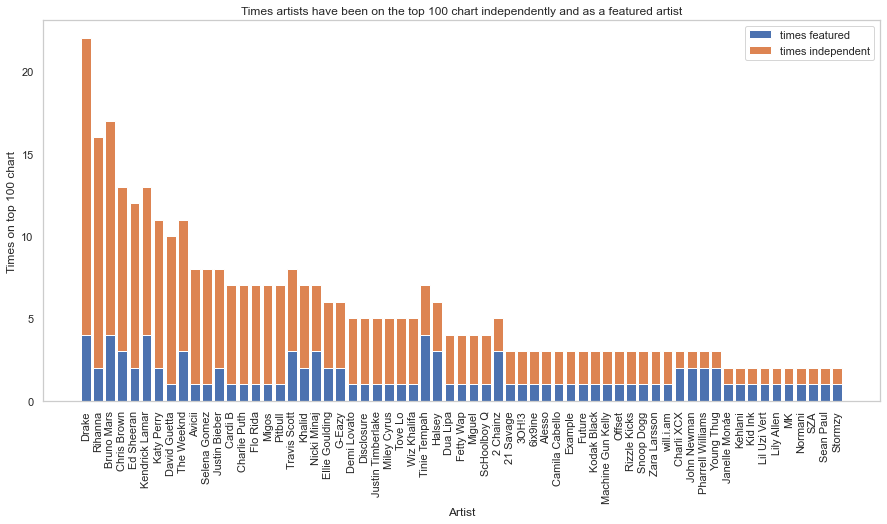

In [30]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
ax.bar(times_feat_and_indep['feat_artist'], times_feat_and_indep['times featured'], label='times featured')
ax.bar(times_feat_and_indep['feat_artist'], times_feat_and_indep['times independent'], label='times independent',bottom=times_feat_and_indep['times featured'])
ax.set_title("Times artists have been on the top 100 chart independently and as a featured artist")
ax.set_xlabel("Artist")
ax.set_ylabel("Times on top 100 chart")
ax.set_xticklabels(labels =times_feat_and_indep['feat_artist'], rotation=90)
ax.legend(loc='upper right')
plt.grid(False)
plt.show()